In [1]:
import math
import matplotlib.pyplot as plt

SR_PC = []
SR_EK=[]
TAU=[]

In [221]:
"""Исходные данные"""
m = 0.01 # в киллограммах
l = 0.1 # в метрах
g = 9.81 # м/c
tau = 0.03 #с (тау)
N = int(10/tau) #количество измерений (по тау)

TAU.append(tau)

In [222]:
"""Начальные условия"""
x_0 = 2
v_0 = 0

In [223]:
def energy(x,v):
    return m*(l**2)*((v**2)/2 + g*(1-math.cos(x))/l)

def func(x):
    return -g*math.sin(x)/l

def draw(X,Y):
    plt.xlabel("t") 
    plt.ylabel("E(t)")
    plt.grid()
    plt.minorticks_on()
    #plt.grid(which='minor',color = 'black', linestyle = ':')
    plt.plot(X,Y)
    
time=[]
method=[]


# метод Эйлера

In [224]:
"""
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    V.append(v + tau * func(x))
    X.append(x + tau * v)
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={}'.format(max(E),min(E)))
"""

"\nV = [v_0]\nX = [x_0]\nT = [0]\nE = [energy(x_0,v_0)]\nfor i in range(N):\n    v = V[-1]\n    x = X[-1]\n    t = T[-1]\n    V.append(v + tau * func(x))\n    X.append(x + tau * v)\n    T.append(t + tau)\n    E.append(energy(X[-1],V[-1]))\ndraw(T,E)\ntime.append(T)\nmethod.append(E)\nprint('max E={}, min E={}'.format(max(E),min(E)))\n"

# метод Эйлера-Кромера

max E=0.01573775249336181, min E=0.012282010267875017


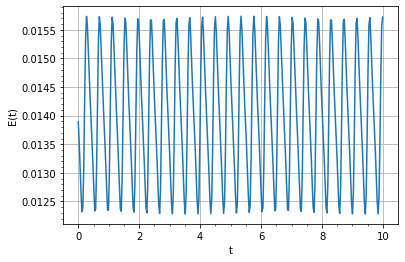

In [225]:
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    V.append(v + tau * func(x))
    X.append(x + tau * V[-1])
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={}'.format(max(E),min(E)))
SR_EK.append(max(E)-((min(E)+max(E))/2))

# метод "предиктор-корректор"

max E=0.017618437333665665, min E=0.013824789188065711,среднее значение=0.01572161326086569


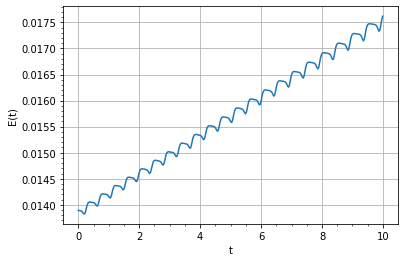

In [226]:
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    v_= v + tau * func(x)
    x_= x + tau * v
    V.append(v + tau * (func(x) + func(x_)) / 2)
    X.append(x + tau * (v + v_) / 2)
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={},среднее значение={}'.format(max(E),min(E),(min(E)+max(E))/2))
SR_PC.append(max(E)-((min(E)+max(E))/2))

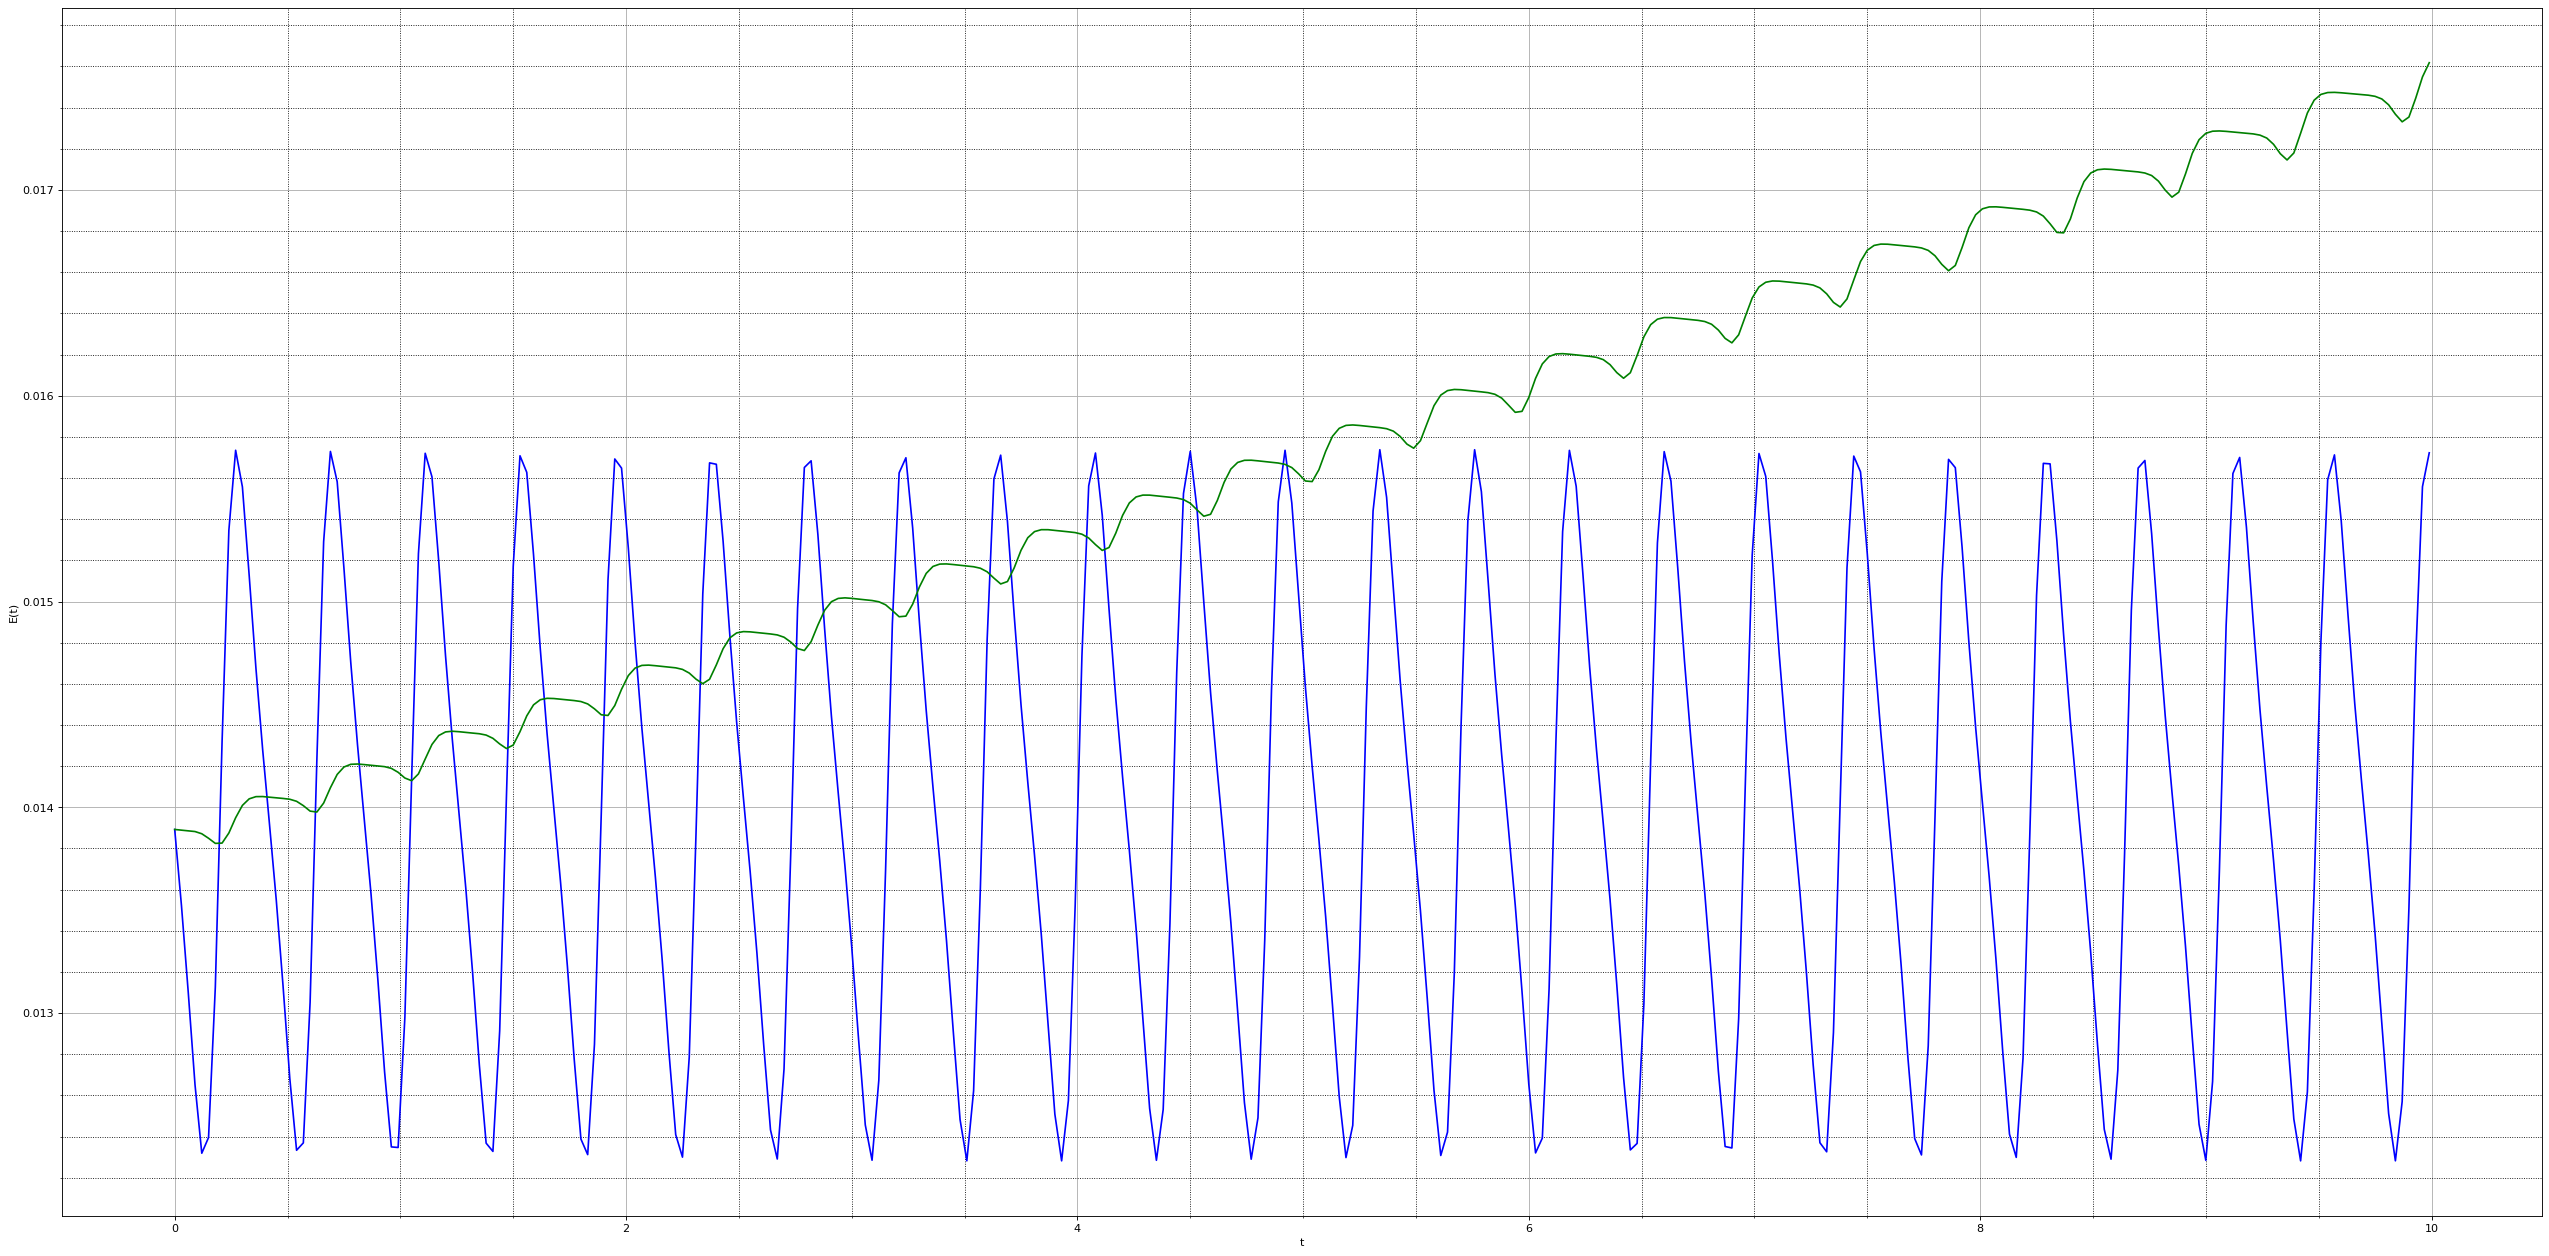

In [227]:
fig=plt.figure(figsize=(40, 20), dpi= 80, facecolor='w', edgecolor='k')

plt.xlabel("t") 
plt.ylabel("E(t)")
plt.grid()
plt.minorticks_on()
plt.grid(which='minor',color = 'black', linestyle = ':')
#plt.plot(time[0],method[0],color = 'r') #Эйлера - красный
plt.plot(time[0],method[0],color = 'b') #Эйлера-Кромера - синий
plt.plot(time[1],method[1],color = 'g') #Предиктор-корректор - зеленый

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.013, 0.015, 0.017, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03] [1.4780917793541515e-07, 8.608338337295907e-07, 2.543315604322874e-06, 5.5995904454306245e-06, 1.043225852788085e-05, 1.7446343431671077e-05, 2.704558455714559e-05, 3.964587014574847e-05, 5.564258154697188e-05, 7.541825719225952e-05, 9.945248101267574e-05, 0.0001618658890718723, 0.00024618661944868225, 0.00035645130716377947, 0.0004956743274410914, 0.0005782447879472841, 0.0006686842146702756, 0.0007701304751273046, 0.0008805653141603937, 0.000997405107157276, 0.0011057911593170093, 0.0012240750442225612, 0.001376873195932736, 0.0015433443135316437, 0.0017235569601101314, 0.0018968240727999762] [5.710418104120339e-05, 0.0001142117261296715, 0.000171319290348311, 0.00022844994087401448, 0.00028558682724413517, 0.00034274125837056163, 0.00039991249473079506, 0.0004571119320227555, 0.0005143338273469501, 0.00057

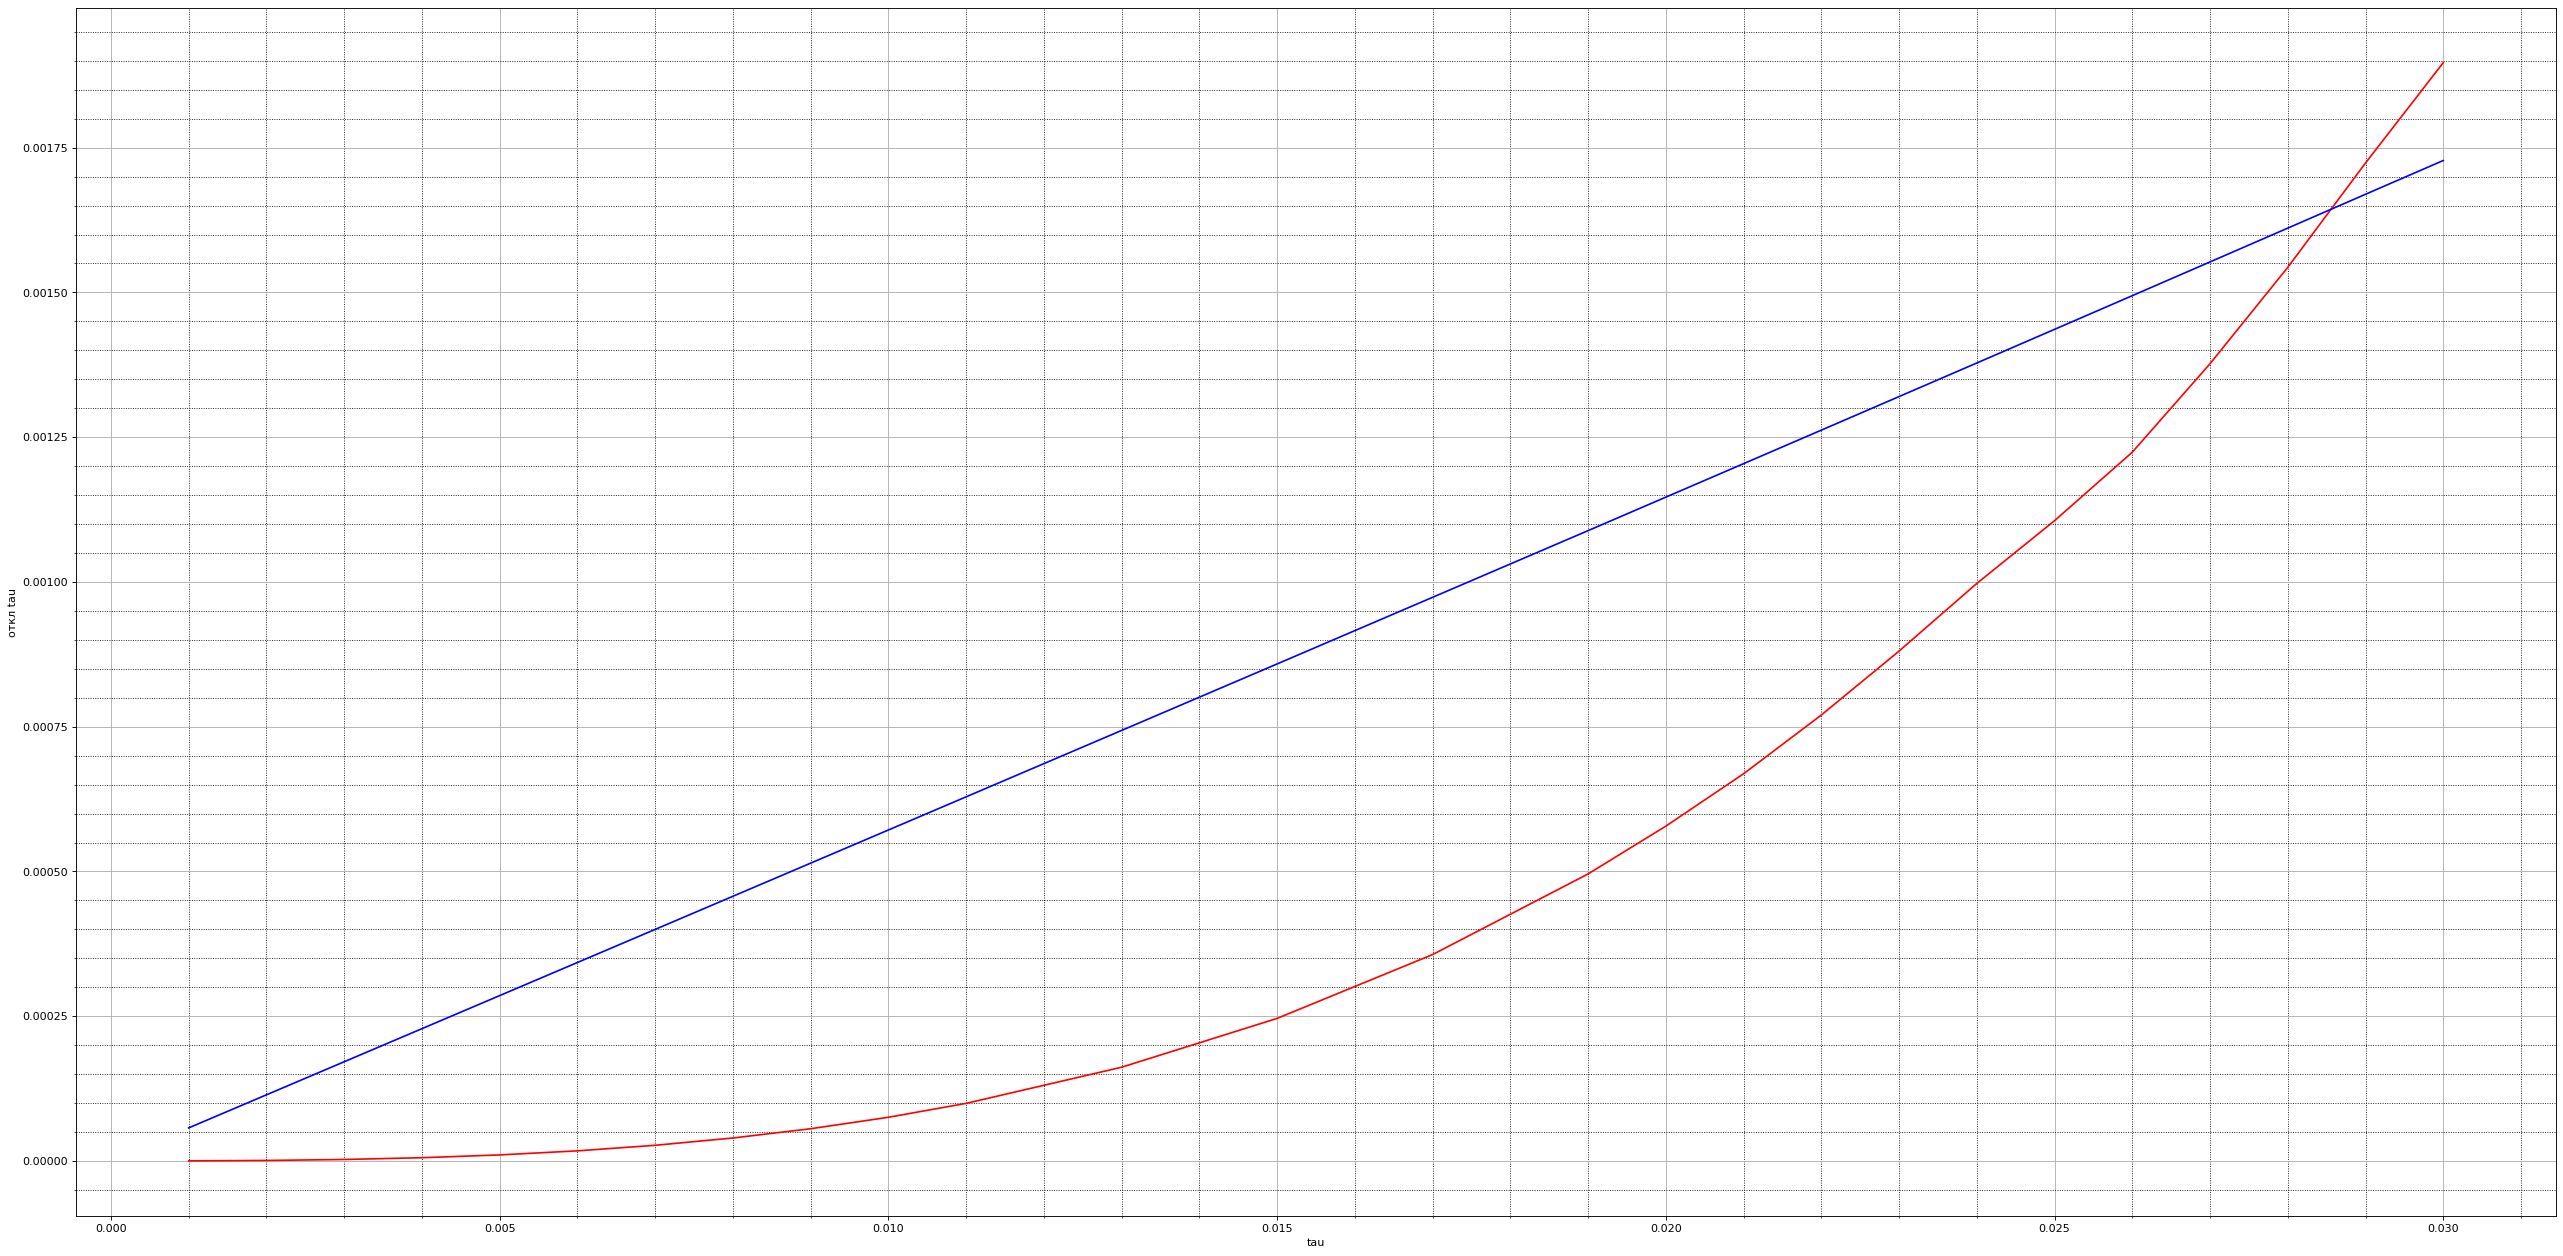

In [229]:
fig=plt.figure(figsize=(40, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel("tau") 
plt.ylabel("откл tau")
print(TAU,SR_PC,SR_EK)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor',color = 'black', linestyle = ':')
plt.plot(TAU,SR_PC,color = 'r') #predictor-corrector
plt.plot(TAU,SR_EK,color='b') #Эйлера-Кромера


In [220]:
TAU_0=[1e-05, 1e-06, 1e-07, 0.0001]
SR_PC_0 = [8.046200858369268e-12, 8.060392631126234e-14, 2.1371793224034263e-15, 8.086667360046595e-10]
SR_EK_0 = [5.71036600300473e-07, 5.710366000194478e-08, 5.710367304012642e-09, 5.710365606316839e-06]


In [230]:
tau = 0.0285